# Data science homework 1

## 資工二 110590038 呂凱達

In [2]:
from string import Template
import pandas as pd
import requests
import time
import datetime
import numpy as np
%matplotlib inline

In [5]:
#設置初始日期
first_date = datetime.date(2022,1,1)
for i in range(365):
    
    #可以使用下一行程式來看程式是否有在執行
    print(first_date,end='\t')
    
    
    #加datetime格式轉成string
    date = str(first_date).replace('-','')
    
    #爬取程式 詳情請參考LAB2
    url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date}&type=ALLBUT0999'
    response = requests.get(url)
    response_json = response.json()
    if response_json['stat']=='OK':
        stock = pd.DataFrame(response_json['data9'], 
                     columns=response_json['fields9'])
        stock['date'] = first_date
        data = pd.concat([data,stock])
        
    # 利用 datetime格式使日期加1天  datetime格式會自動進位月分與年份 
    first_date = first_date + datetime.timedelta(days=1)
    
    # *****非常重要*****
    # *****非常重要*****
    # *****非常重要*****
    # 將程式延遲5秒在執行下一次迴圈
    time.sleep(5)

data.to_csv('data_science_data.csv')

2022-01-01	2022-01-02	2022-01-03	2022-01-04	2022-01-05	2022-01-06	2022-01-07	2022-01-08	2022-01-09	2022-01-10	2022-01-11	2022-01-12	2022-01-13	2022-01-14	2022-01-15	2022-01-16	2022-01-17	2022-01-18	2022-01-19	2022-01-20	2022-01-21	2022-01-22	2022-01-23	2022-01-24	2022-01-25	2022-01-26	2022-01-27	2022-01-28	2022-01-29	2022-01-30	2022-01-31	2022-02-01	2022-02-02	2022-02-03	2022-02-04	2022-02-05	2022-02-06	2022-02-07	2022-02-08	2022-02-09	2022-02-10	2022-02-11	2022-02-12	2022-02-13	2022-02-14	2022-02-15	2022-02-16	2022-02-17	2022-02-18	2022-02-19	2022-02-20	2022-02-21	2022-02-22	2022-02-23	2022-02-24	2022-02-25	2022-02-26	2022-02-27	2022-02-28	2022-03-01	2022-03-02	2022-03-03	2022-03-04	2022-03-05	2022-03-06	2022-03-07	2022-03-08	2022-03-09	2022-03-10	2022-03-11	2022-03-12	2022-03-13	2022-03-14	2022-03-15	2022-03-16	2022-03-17	2022-03-18	2022-03-19	2022-03-20	2022-03-21	2022-03-22	2022-03-23	2022-03-24	2022-03-25	2022-03-26	2022-03-27	2022-03-28	2022-03-29	2022-03-30	2022-03-31	2022-04-01

C:\Users\bob10\AppData\Local\Temp\ipykernel_4580\4173509697.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\\Users\\bob10\\資料科學導論\\hw_03\data_science_data.csv',index_col=0)


<AxesSubplot:xlabel='date'>

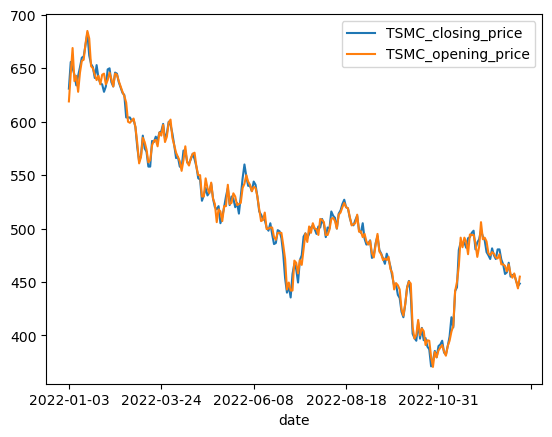

In [3]:
data = pd.read_csv('C:\\Users\\bob10\\資料科學導論\\hw_03\data_science_data.csv',index_col=0)
data = data[['date','證券名稱','收盤價', '開盤價']]
data = data[data['證券名稱'] == '台積電']
data = data.rename(columns = {'證券名稱':'name'})
data = data.rename(columns = {'收盤價':'TSMC_closing_price'})
data = data.rename(columns = {'開盤價':'TSMC_opening_price'})
data[['TSMC_closing_price', 'TSMC_opening_price']] = data[['TSMC_closing_price', 'TSMC_opening_price']].replace({'\$': '', ',': '', '--':np.nan}, regex=True)
data = data[data.notna()]
data = data.drop('name', axis=1)
data[['TSMC_closing_price', 'TSMC_opening_price']] = data[['TSMC_closing_price', 'TSMC_opening_price']].astype('float64')

data = data.set_index('date')
data.plot()